scikit-learn linear regression

[-8.         -7.83673469 -7.67346939 -7.51020408 -7.34693878 -7.18367347
 -7.02040816 -6.85714286 -6.69387755 -6.53061224 -6.36734694 -6.20408163
 -6.04081633 -5.87755102 -5.71428571 -5.55102041 -5.3877551  -5.2244898
 -5.06122449 -4.89795918 -4.73469388 -4.57142857 -4.40816327 -4.24489796
 -4.08163265 -3.91836735 -3.75510204 -3.59183673 -3.42857143 -3.26530612
 -3.10204082 -2.93877551 -2.7755102  -2.6122449  -2.44897959 -2.28571429
 -2.12244898 -1.95918367 -1.79591837 -1.63265306 -1.46938776 -1.30612245
 -1.14285714 -0.97959184 -0.81632653 -0.65306122 -0.48979592 -0.32653061
 -0.16326531  0.        ]


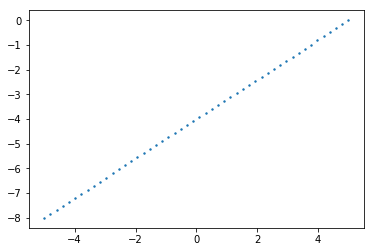

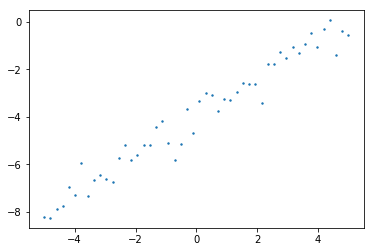

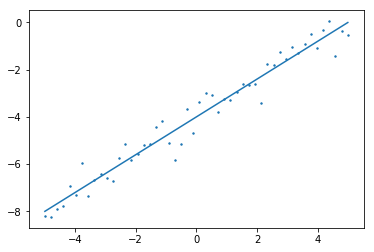

(LinearRegression:base) coef_=[0.8], intercept=-4.0
(LinearRegression:noise) coef_=[0.81808975], intercept=-4.025937033231002
scores = [0.95966669 0.95262814]
max = 0.9596666893239698, ave = 0.9561474128713308, min = 0.9526281364186918


In [15]:
# -*- coding: utf-8 -*-
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.svm import LinearSVC, SVC
import numpy as np
import matplotlib.pyplot as plt

# 1次元サンプルを -5〜+5 の範囲でn分割して用意
#ここでは、分割数 = 事例数。
n = 50
x_base = np.linspace(-5, 5, n)
#print(x_base)

# 1次式(y = a*x +b) で出力を用意。
# 今回は y = 0.8*x - 4 とする。
a = 0.8
b = -4
y_base = np.polyval([a, b], x_base)
print(y_base)

# 生成したデータセット(x_base, y_base) を散布図出力して確認
# pl.scatter(): s=点のサイズ
import pylab as pl
pl.figure()
pl.scatter(x_base, y_base, s=2)
pl.show()

# y1_base にノイズを付与したデータセットを用意
# 　0.5倍してるのはガウシアン分布のままだと、
# 　元の値(y_base)に対してノイズの割合が大きすぎるため。
y_noise = y_base + np.random.normal(size=n) * 0.5
pl.figure()
pl.scatter(x_base, y_noise, s=2)
pl.show()

# y_noise と実モデル(y=0.8*x-4)を同時に描画
# この実モデルを y_base や y_noise から推定したい。
pl.figure()
pl.plot(x_base, y_base)
pl.scatter(x_base, y_noise, s=2)
pl.show()

# x_base は1サンプル=1数値として列挙されている。
# 1サンプルを1リストとして表現するため、型変換。
# さらに、このままでは一部の機能が使えないため、np.ndarray() に変換。
# オブジェクトの方は type() で確認可能。
data_list = [[x_base[i]] for i in range(len(x_base))]
data = np.array(data_list)
target = y_base
#print(data)
#print(target)

# 線形回帰モデルを準備
from sklearn import linear_model
regr = linear_model.LinearRegression()

# 手動で fitting してみる
#   LinearRegression(): coef_に傾き、intercept_に切片が得られる。
np.random.seed(0)
indices = np.random.permutation(len(data))
half = len(data)//2
data_train = data[indices[:half]]
data_test = data[indices[half:]]
target_train = target[indices[:half]]
target_test = target[indices[half:]]

regr.fit(data_train, target_train)
regr.score(data_test, target_test)
print("(LinearRegression:base) coef_=%s, intercept=%s" % (regr.coef_, regr.intercept_))

# ノイズデータでも fitting してみる
target = y_noise
target_train = target[indices[:half]]
target_test = target[indices[half:]]
regr.fit(data_train, target_train)
regr.score(data_test, target_test)
print("(LinearRegression:noise) coef_=%s, intercept=%s" % (regr.coef_, regr.intercept_))


# ノイズデータに対してシンプルに交差検定してみる
np.random.seed(0)
kfold = KFold(n_splits=2, shuffle=True)
# n: 要素数
# n_folds: 分割数
# shuffle=True: シャッフルする 
scores = cross_val_score(regr, data, target, cv=kfold, n_jobs=-1)
# regr : 回帰
# data : x
# target : y
# cv=kfold : cv generatorを指定
# n_jobs=-1 : 全てのCPUを使う
print("scores =", scores)
print("max = %s, ave = %s, min = %s" % (scores.max(), scores.mean(), scores.min()))




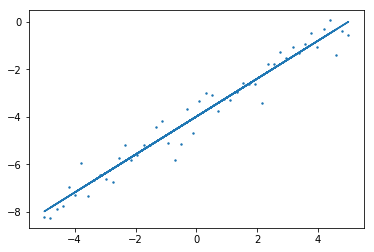

In [20]:
# 交差検定しながら fitting 状況を描画
pl.figure()
pl.scatter(data, target, s=2)
#for train_indices, test_indices in kfold:
#train_data = [data[i] for i in train_indices]
#train_target = [target[i] for i in train_indices]
#regr.fit(train_data, train_target)
#test_indices.sort()
#test_data = [data[i] for i in test_indices]
#test_target = [target[i] for i in test_indices]
#estimated = regr.predict(test_data)
#pl.plot(test_data, estimated)

#for train_indices, test_indices in kfold:
#train_data = train_indices
#train_target = train_indices
regr.fit(data, target)
#test_indices.sort()
#test_data = test_indices
#test_target = test_indices
estimated = regr.predict(data_test)
pl.plot(data_test, estimated)
pl.show()